# One-variable Linear Regression in learning the correlation between Wife's age and Husband's age
Implement your first machine learning algorithm in Python, Linear Regression. (From scratch, no library needed)

<img src="https://i.imgur.com/PF7O9fh.jpg" alt="drawing" style="width:120px;"/>

*This notebook is written by Nguyen Truong Phat - Data Go Research Team - HCMC University of Information Technology*


# Import libraries

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fetch data from excel file

In [2]:
#import file excel into df (dataframe)
df=pd.read_excel('HusbandWife.xlsx')
df.head()

,Wife's Age,Husband's Age
0,43,49
1,28,25
2,30,40
3,57,52
4,52,58


# Simple Pre-processing data method - Changing columns' name

In [3]:
# Rename columns for easier manipulating
df.rename(columns={"Wife's Age":"Wife","Husband's Age":"Husband"},inplace=True)
df.head()

,Wife,Husband
0,43,49
1,28,25
2,30,40
3,57,52
4,52,58


In [4]:
# Fetch husband's data into X, Wife's to Y accordingly
X=np.array(df['Husband'])
Y=np.array(df['Wife'])
print(X)

[49 25 40 52 58 32 43 47 31 26 40 35 35 35 47 38 33 32 38 29 59 26 50 49
 42 33 27 57 34 28 37 56 27 36 31 57 55 47 64 31 35 36 40 30 32 20 45 59
 43 29 47 54 43 54 61 27 27 32 54 37 55 36 32 57 51 50 32 54 34 45 64 55
 27 55 41 44 22 30 53 42 31 36 56 46 34 55 44 45 48 44 59 64 34 37 54 49
 63 48 64 33 52 27 33 46 54 54 49 62 34 23 36 59 53 55 62 42 50 37 51 25
 54 34 43 43 58 28 45 47 57 34 57 27 48 37 25 57 40 61 25 24 47 44 52 45
 20 60 36 25 25 35 49 33 50 63 57 41 38 30 52 51 46 50 52 30 20 51 64 44
 40 59]


# Visualizing & Analyzing data
Plot the data to see the trend of data in order to choose the best possible model architecture

<IPython.core.display.Javascript object>


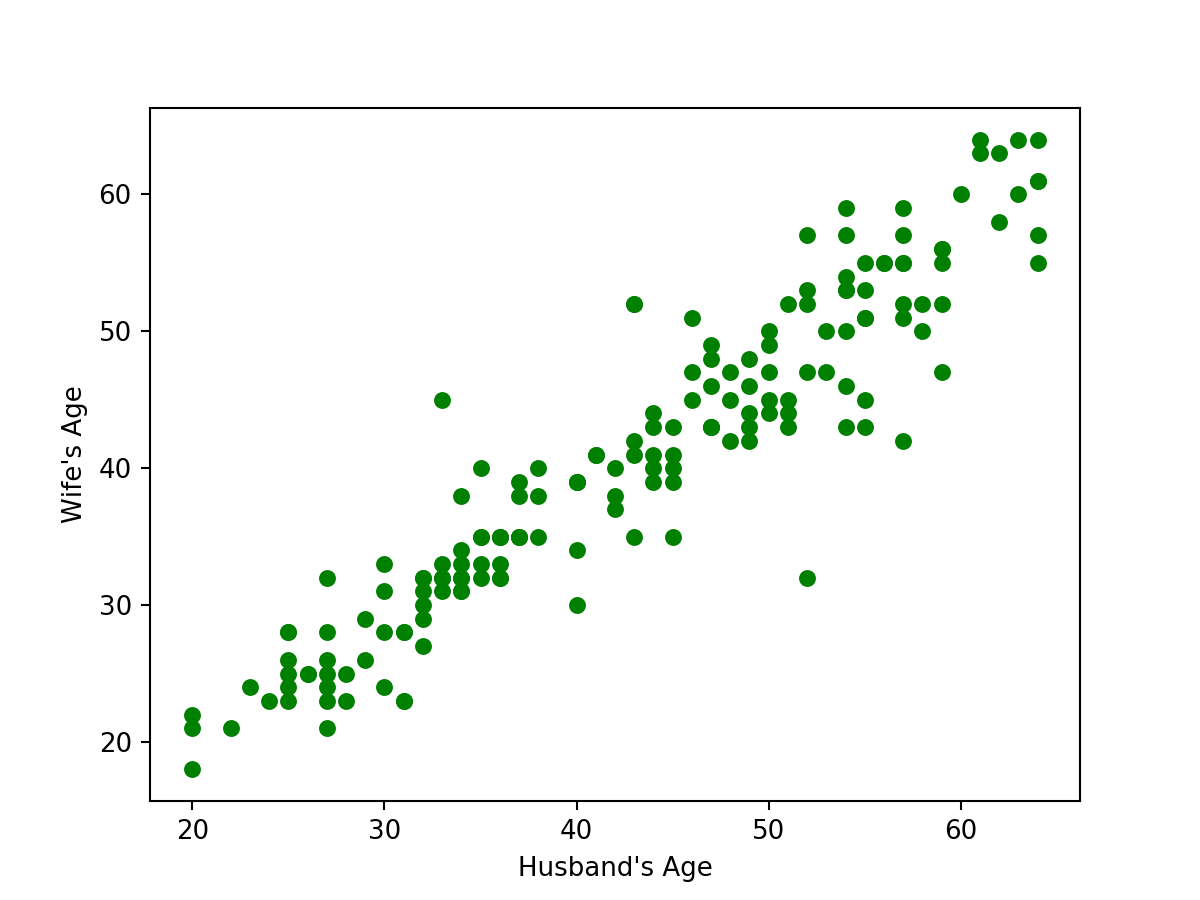

Text(0.5,0,"Husband's Age")

In [5]:
plt.scatter(X,Y,c='green',s=30)
plt.gca().set_ylabel("Wife's Age")
plt.gca().set_xlabel("Husband's Age")

# Prediction
Predict the output using your hypothesis (with theta1,theta0 accordingly)
$$ h(x)= \theta_1X +\theta_0 $$


In [6]:
def Prediction(X,theta1,theta0):
    return X*theta1+theta0

# Initializing 
Initialize thetas using np.random.random() function.

In [7]:
np.random.seed(123)

def InitTheta():
    Theta1=-np.random.random()
    Theta0=np.random.random()
    return Theta1,Theta0

# Cost Function J
Use the cost function to evaluate how good our model performs.
$$ J(\theta)=\frac{1}{2m} \sum_{i=0}^m (h(X^i)-Y^i)^2$$

In [8]:
def CostFunc(X,Y,theta1,theta0):
    m=len(X)
    return (1.0/(2*m))*np.sum(((Prediction(X,theta1,theta0)-Y)**2))

# Gradient calculation
Calculate the grad of theta0 and theta1 using partial derivative
$$ \frac{\partial J}{\partial \theta_0} = \frac{\alpha}{m} \sum_{x=0}^m=h(X^i)-Y^i $$
$$ \frac{\partial J}{\partial \theta_1} = \frac{\alpha}{m} \sum_{x=0}^m=(h(X^i)-Y^i)X^i $$

In [16]:
def Grad(X,Y,theta1,theta0,alpha):
    m=len(X)
    prediction=Prediction(X,theta1,theta0)
    d0=alpha/m*np.sum(prediction-Y)
    d1=alpha/m*np.sum((prediction-Y)*X)
    return d1,d0

# Optimization
Optimize your model using Gradient Descent
$$ \Theta_0=\Theta_0 - \alpha\frac{\partial J}{\partial \theta_0}$$
$$ \Theta_1=\Theta_1 - \alpha\frac{\partial J}{\partial \theta_1}$$

In [17]:
def Optimize(X,Y,theta1,theta0,iterations,alpha):
    #Record the history of thetas & cfuncs
    ThetaRec=np.array([theta1,theta0])
    CFuncRec=np.array([CostFunc(X,Y,theta1,theta0)])
    b=np.array([3,4,2,3])
    
    
    for i in range(iterations):
        
        # Retrieve grad from Grad() function
        d1,d0=Grad(X,Y,theta1,theta0,alpha)
        
        # Optimize theta1 and theta0 use Gradient Descent
        theta1=theta1-alpha*d1
        theta0=theta0-alpha*d0
        
        #Append previous Theta and CFunc
        ThetaRec=np.vstack((ThetaRec,np.array([theta1,theta0])))
        CFuncRec=np.append(CFuncRec,np.array([CostFunc(X,Y,theta1,theta0)]))
    return theta1,theta0,ThetaRec,CFuncRec

# Combine functions to build a full model

In [18]:
def Model(X,Y,iterations,alpha):
    # Retrieve initial theta value
    theta1,theta0 = InitTheta()
    
    # Retrieve optimized theta1,theta0
    theta1,theta0,ThetaRec,CFuncRec = Optimize(X,Y,theta1,theta0,iterations,alpha)
    
    # Calculate the cost function
    costfunc = CostFunc(X,Y,theta1,theta0)
    
    d = {"theta1":theta1,"theta0":theta0,"cfunc":costfunc}

    return d,ThetaRec,CFuncRec

In [19]:
# Main
mymodel,ThetaRec,CFuncRec=Model(X,Y,iterations=100,alpha=0.01)
mymodel

{'theta1': 0.9328570606112839,
 'theta0': 0.5771537793601499,
 'cfunc': 7.747921201151916}

In [20]:
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation
    if curr == 100: 
        a.event_source.stop()
    plt.cla()
    plt.scatter(X,Y,color='green')
    plt.axis([15,75,15,75])
    Xvals=np.array([20,70])
    Yvals=np.array(Prediction(Xvals,ThetaRec[curr][0],ThetaRec[curr][1]))
    plt.plot(Xvals,Yvals,color='red')
    plt.gca().set_title('Linear Regression')
    plt.gca().set_ylabel("Wife's Age")
    plt.gca().set_xlabel("Husband's Age")
    plt.annotate('Cost Function = {}'.format(CFuncRec[curr]), [20,70])

<IPython.core.display.Javascript object>


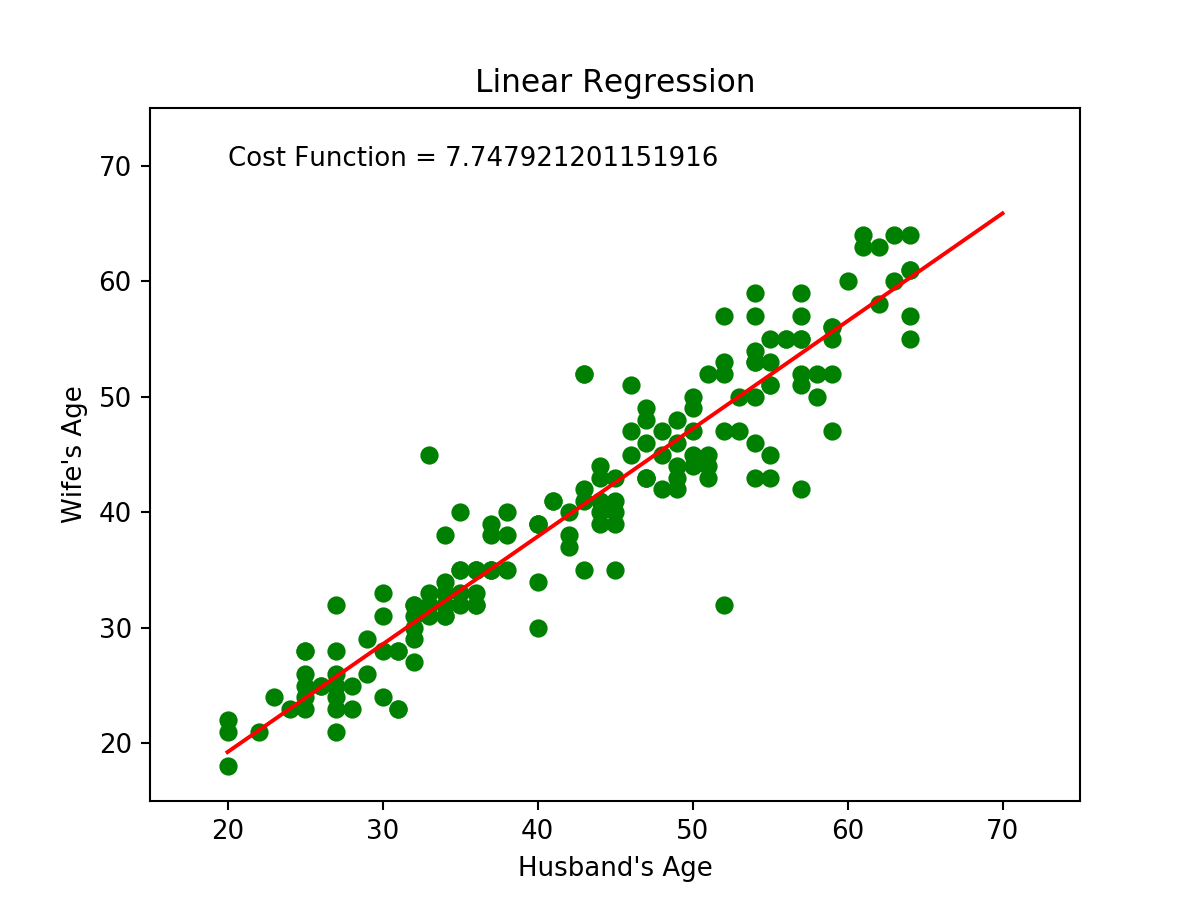

In [22]:
# Run this to see our model learn!
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# Wanna test the prediction ?

In [23]:
#Run this code to test the implementation
print('Predicted Wife\'s Age:',Prediction(int(input('Enter Husband\'s Age: ')),mymodel['theta1'],mymodel['theta0']))

Enter Husband's Age: 34
Predicted Wife's Age: 32.2942938401438
